In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# read in the csv file
bb = pd.read_csv('../project-05/LoanStats3d.csv', \
         keep_default_na = False, skiprows=1, usecols=['int_rate', \
        'dti', 'annual_inc', 'home_ownership', 'funded_amnt', 'term', 'loan_status'])

bb.columns

/Users/Misha/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,13,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'funded_amnt', u'term', u'int_rate', u'home_ownership', u'annual_inc',
       u'loan_status', u'dti'],
      dtype='object')

In [10]:
bb.head(10)

,funded_amnt,term,int_rate,home_ownership,annual_inc,loan_status,dti
0,35000,60 months,14.85%,MORTGAGE,110000,Current,17.06
1,10400,60 months,22.45%,MORTGAGE,104433,Fully Paid,25.37
2,20000,60 months,10.78%,MORTGAGE,63000,Current,10.78
3,25000,36 months,7.49%,MORTGAGE,109000,Fully Paid,26.02
4,28000,36 months,6.49%,MORTGAGE,92000,Current,21.6
5,18000,60 months,11.99%,MORTGAGE,112000,Fully Paid,8.68
6,16000,60 months,14.85%,MORTGAGE,48000,Current,33.18
7,23000,60 months,8.49%,RENT,64000,Current,18.28
8,8650,36 months,19.89%,RENT,55000,Fully Paid,25.49
9,9600,36 months,7.49%,MORTGAGE,60000,Current,22.44


In [11]:
print set(bb.loan_status)
print set(bb.home_ownership)

set(['', 'Late (31-120 days)', 'Default', 'Fully Paid', 'Current', 'Late (16-30 days)', 'Charged Off', 'In Grace Period'])
set(['', 'OWN', 'RENT', 'MORTGAGE', 'ANY'])


In [12]:
# remove blank rows
bb[bb['loan_status'] == '']
bb[bb['funded_amnt'] == '']
bb[bb['int_rate'] == '']
bb[bb['home_ownership'] == '']
bb[bb['annual_inc'] == '']
bb[bb['dti'] == '']

,funded_amnt,term,int_rate,home_ownership,annual_inc,loan_status,dti
421095,,,,,,,
421096,,,,,,,


In [13]:
# Convert blanks to NaN's 

bb['loan_status'].replace('', np.nan, inplace=True)

In [14]:
bb.isnull().sum()

funded_amnt       0
term              0
int_rate          0
home_ownership    0
annual_inc        0
loan_status       2
dti               0
dtype: int64

In [15]:
# Drop NA's.

bb = bb.dropna()
bb.isnull().sum()

funded_amnt       0
term              0
int_rate          0
home_ownership    0
annual_inc        0
loan_status       0
dti               0
dtype: int64

In [16]:
len(bb[bb['loan_status'] == 'Current'])

303912

In [17]:
# set the non-current loans to equal bb
bb = bb[bb['loan_status'] != 'Current']
bb.head(1)

,funded_amnt,term,int_rate,home_ownership,annual_inc,loan_status,dti
1,10400,60 months,22.45%,MORTGAGE,104433,Fully Paid,25.37


In [18]:
# Random sampling of 1000 data points

bb = bb.take(np.random.permutation(len(bb))[:1000])

In [19]:
# create column target by initilizing the column to all 0's, than set the loan
# statuses of the column into two different categories. Than count how many of each.
bb['target'] = [0]*len(bb)
bb['target'][bb['loan_status'] == 'In Grace Period'] = 1
bb['target'][bb['loan_status'] == 'Fully Paid'] = 1

del bb['loan_status']

bb['target'].value_counts()

/Users/Misha/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Misha/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1    673
0    327
Name: target, dtype: int64

In [20]:
bb.head(1)

,funded_amnt,term,int_rate,home_ownership,annual_inc,dti,target
335699,18450,36 months,18.25%,RENT,37000,34.9,1


In [21]:
bb = bb.reset_index(drop = True)
bad = np.where(bb['target'] == 0)[0]
good = np.where(bb['target'] == 1)[0]

In [22]:
# Remove % sign for interest rate
bb.int_rate = [float(x[:-1]) if (type(x) == str) else x for x in bb['int_rate']]

In [23]:
# Remove non-numeric characters from term column
bb.term = [int(x[:-6]) if (type(x) == str) else x for x in bb['term']]

In [24]:
bb.dtypes

funded_amnt        object
term                int64
int_rate          float64
home_ownership     object
annual_inc         object
dti                object
target              int64
dtype: object

In [25]:
# convert column to integers
bb.funded_amnt = [int(x) if (type(x) == str) else x for x in bb['funded_amnt']]

In [26]:
# convert column to floats
bb.annual_inc  = [float(x) if (type(x) == str) else x for x in bb['annual_inc']]

In [27]:
# covert to float
bb.dti = [float(x) if (type(x) == str) else x for x in bb['dti']]

In [28]:
# Get dummies for Term

term = pd.get_dummies(bb.term)

term.columns = ["36 months", "60 months"]

In [29]:
# Add new term columns to table dataset.

bb = pd.concat([bb, term], axis = 1)

del bb["term"]
del bb['36 months']

In [30]:
# Create dummy variable for every category under home ownership

dumb_home = pd.get_dummies(bb.home_ownership)

dumb_home.head(2)

,MORTGAGE,OWN,RENT
0,0,0,1
1,1,0,0


In [31]:
# Add newly created dummy variable columns to dataset.

bb = pd.concat([bb, dumb_home], axis = 1)

del bb['home_ownership']
del bb['MORTGAGE']

In [32]:
bb.head(1)

,funded_amnt,int_rate,annual_inc,dti,target,60 months,OWN,RENT
0,18450,18.25,37000.0,34.9,1,0,0,1


In [33]:
bb.dtypes

funded_amnt      int64
int_rate       float64
annual_inc     float64
dti            float64
target           int64
60 months        uint8
OWN              uint8
RENT             uint8
dtype: object

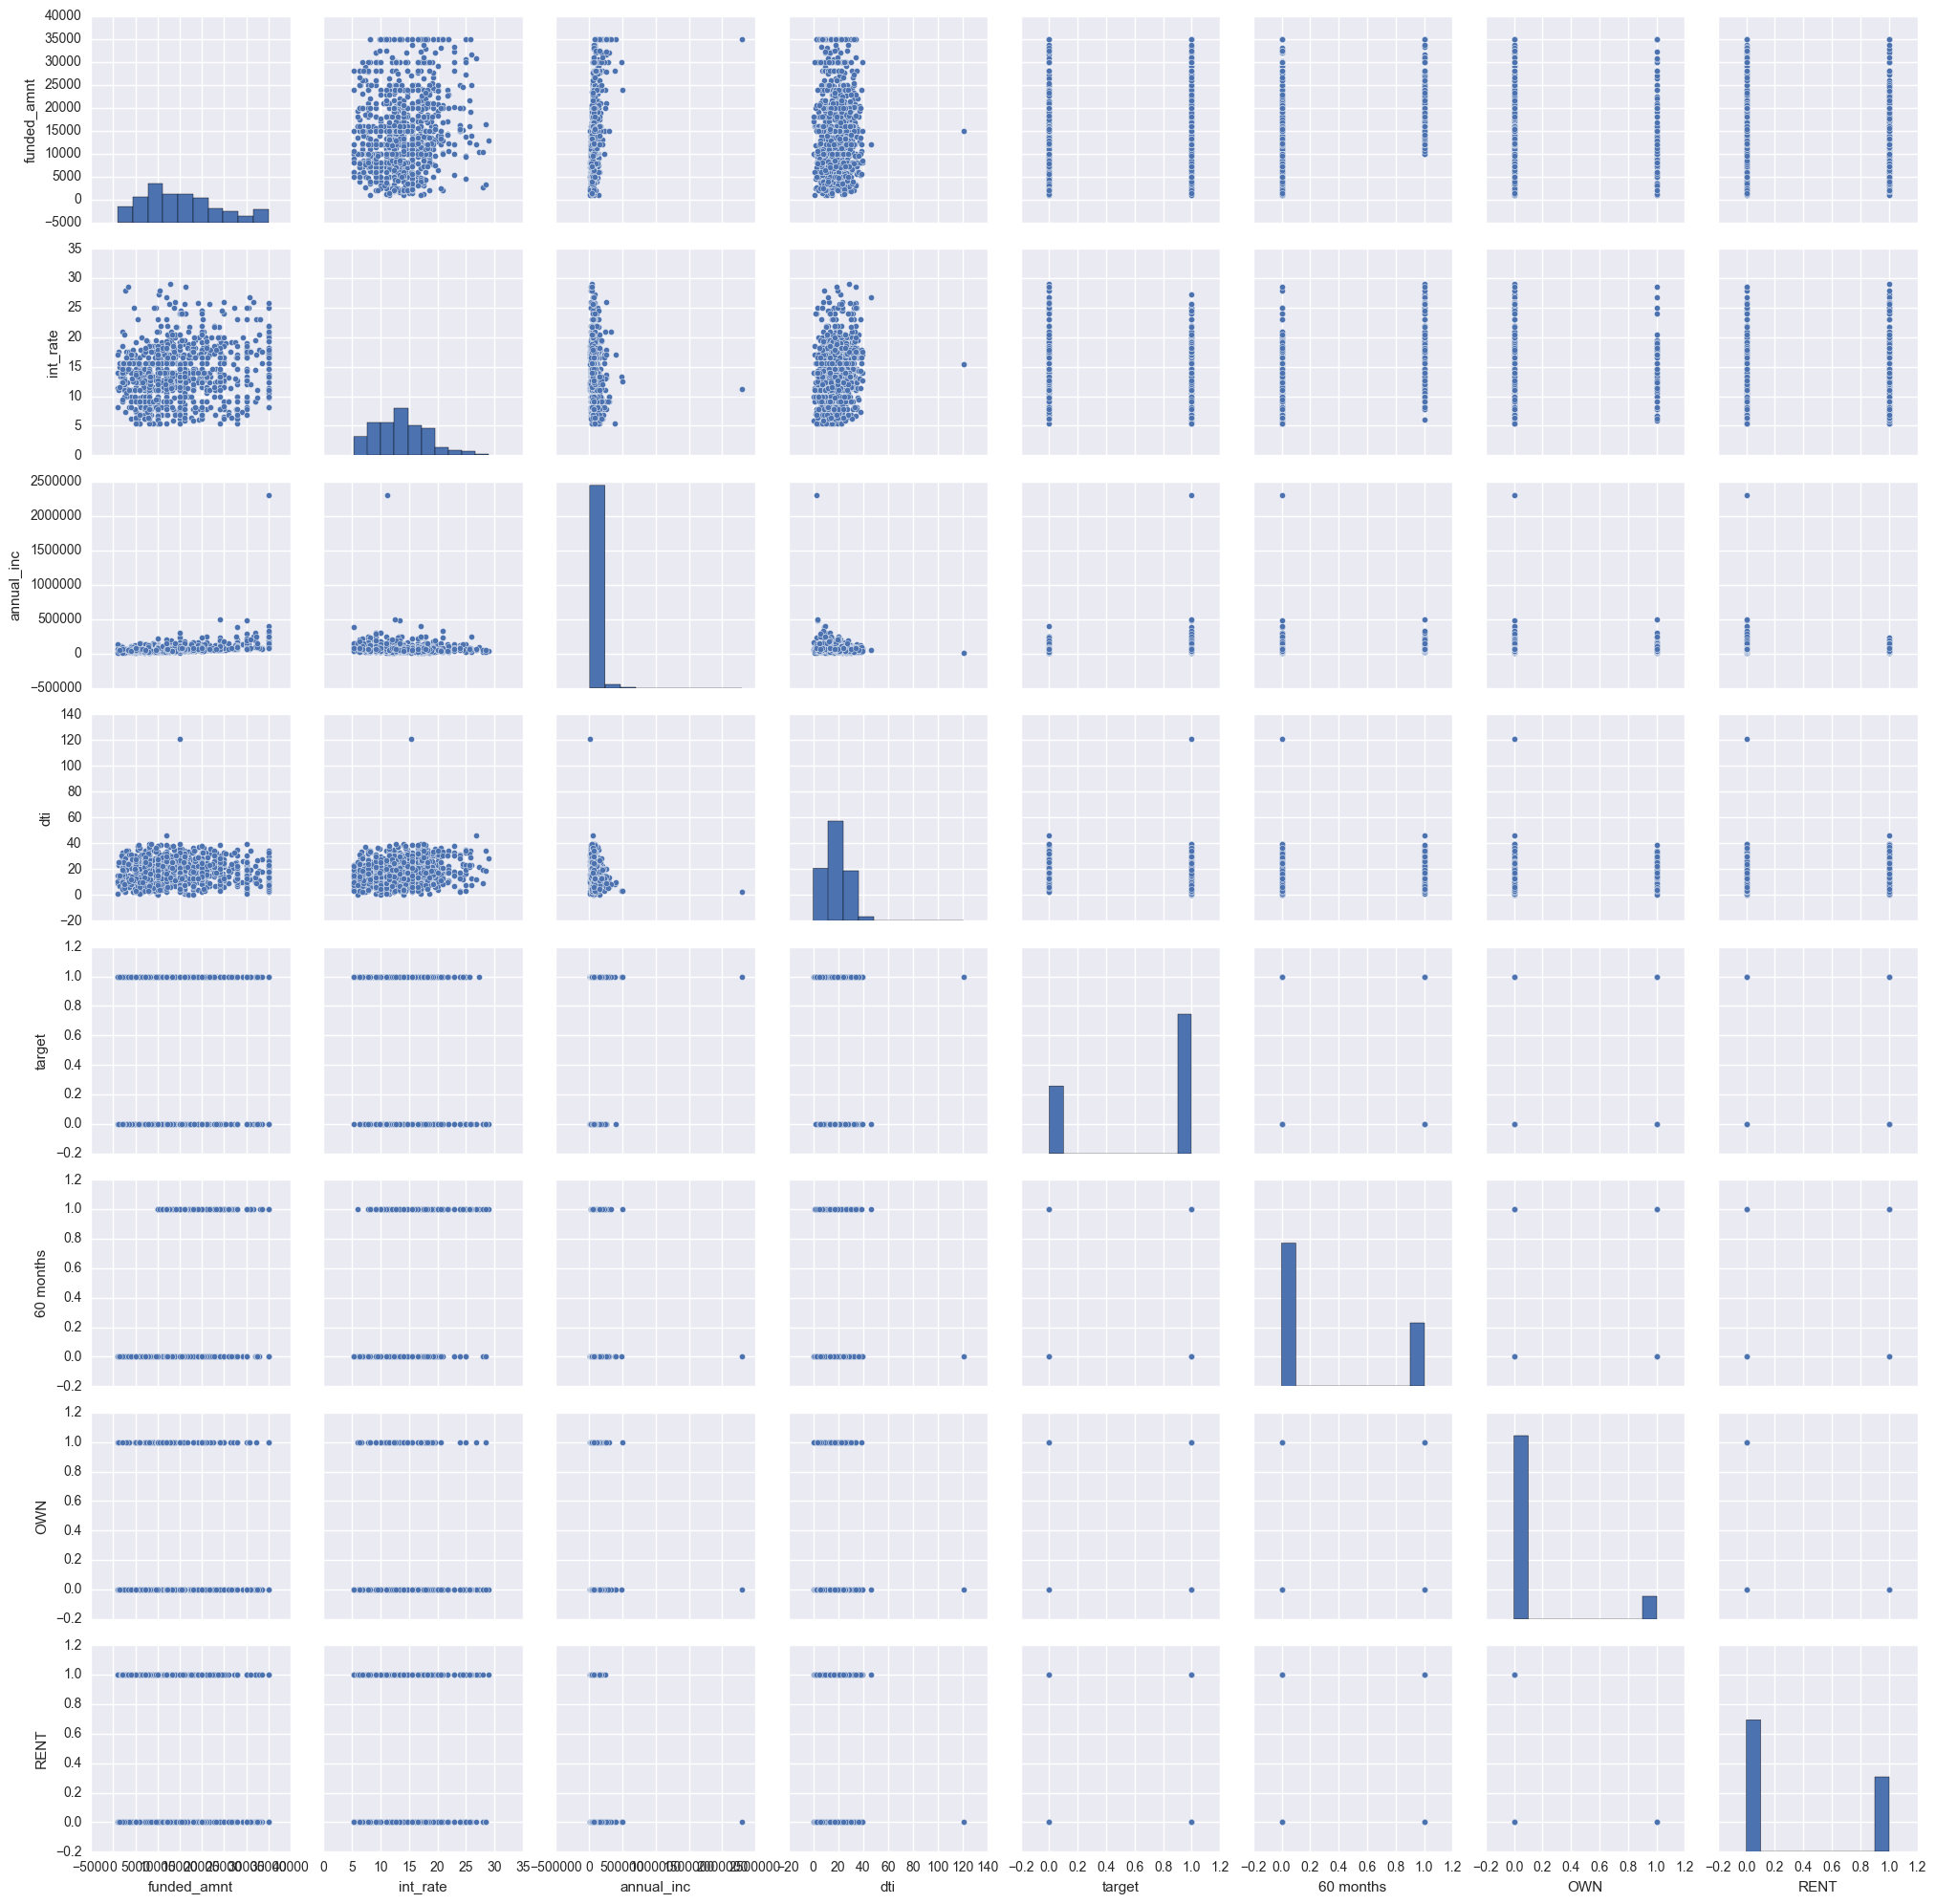

In [34]:
sns.pairplot(bb)

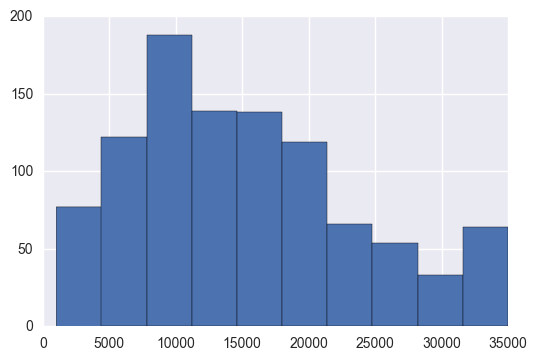

In [35]:
bb.funded_amnt.hist()

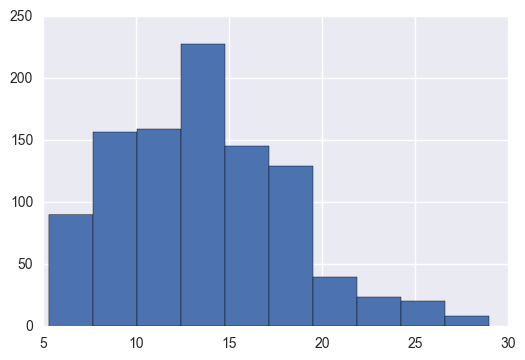

In [36]:
bb.int_rate.hist()

In [37]:
bb.head(10)

,funded_amnt,int_rate,annual_inc,dti,target,60 months,OWN,RENT
0,18450,18.25,37000.0,34.90,1,0,0,1
1,7950,6.89,72000.0,8.15,1,0,0,0
2,12250,21.99,70000.0,11.49,0,1,0,0
3,28000,22.99,120000.0,17.66,1,1,0,0
4,16000,12.29,58000.0,33.39,1,0,0,0
5,15000,9.99,70000.0,19.13,1,0,1,0
6,14250,21.67,56500.0,20.18,1,1,0,1
7,31700,25.99,250000.0,12.83,0,1,0,0
8,2500,12.99,48000.0,30.50,0,0,0,0
9,12600,16.55,30000.0,16.52,0,1,0,1


In [38]:
#Normalizing numerical variables

from sklearn.preprocessing import MinMaxScaler
y = pd.DataFrame(bb['target'], columns = ['target'])
X = bb.drop(['target'], axis = 1)
X_scaled = MinMaxScaler().fit_transform(X.astype(float))
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)


In [39]:
#X_scaled.head()

In [40]:

min_val = float(bb['funded_amnt'].min())
max_val = float(bb['funded_amnt'].max())

def min_max(x):
    return (x-min_val)/(max_val-min_val)
bb['funded_amnt_standardized'] = bb['funded_amnt'].apply(lambda x: min_max(x))
bb

minimum_int_rate = float(bb['int_rate'].min())
maximum_int_rate = float(bb['int_rate'].max())

def min_max(x):
    return (x-minimum_int_rate)/(maximum_int_rate-minimum_int_rate)
bb['intest_rate_standardized'] = bb['int_rate'].apply(lambda x: min_max(x))
bb


minimum_annual_inc = float(bb['annual_inc'].min())
maximum_annual_inc = float(bb['annual_inc'].max())

def min_max(x):
    return (x-minimum_annual_inc)/(maximum_annual_inc-minimum_annual_inc)
bb['annual_inc_standardized'] = bb['annual_inc'].apply(lambda x: min_max(x))
bb

minimum_dti = float(bb['dti'].min())
maximum_dti = float(bb['dti'].max())

def min_max(x):
    return (x-minimum_dti)/(maximum_dti-minimum_dti)
bb['dti_standardized'] = bb['dti'].apply(lambda x: min_max(x))
bb





,funded_amnt,int_rate,annual_inc,dti,target,60 months,OWN,RENT,funded_amnt_standardized,intest_rate_standardized,annual_inc_standardized,dti_standardized
0,18450,18.25,37000.0,34.90,1,0,0,1,0.513235,0.546261,0.012351,0.289242
1,7950,6.89,72000.0,8.15,1,0,0,0,0.204412,0.066329,0.027626,0.067545
2,12250,21.99,70000.0,11.49,0,1,0,0,0.330882,0.704267,0.026753,0.095226
3,28000,22.99,120000.0,17.66,1,1,0,0,0.794118,0.746515,0.048575,0.146362
4,16000,12.29,58000.0,33.39,1,0,0,0,0.441176,0.294466,0.021516,0.276728
5,15000,9.99,70000.0,19.13,1,0,1,0,0.411765,0.197296,0.026753,0.158545
6,14250,21.67,56500.0,20.18,1,1,0,1,0.389706,0.690748,0.020862,0.167247
7,31700,25.99,250000.0,12.83,0,1,0,0,0.902941,0.873257,0.105311,0.106332
8,2500,12.99,48000.0,30.50,0,0,0,0,0.044118,0.324039,0.017152,0.252776
9,12600,16.55,30000.0,16.52,0,1,0,1,0.341176,0.474440,0.009296,0.136914


In [41]:
del bb['funded_amnt']
del bb['int_rate']  
del bb['annual_inc']
del bb['dti']                  


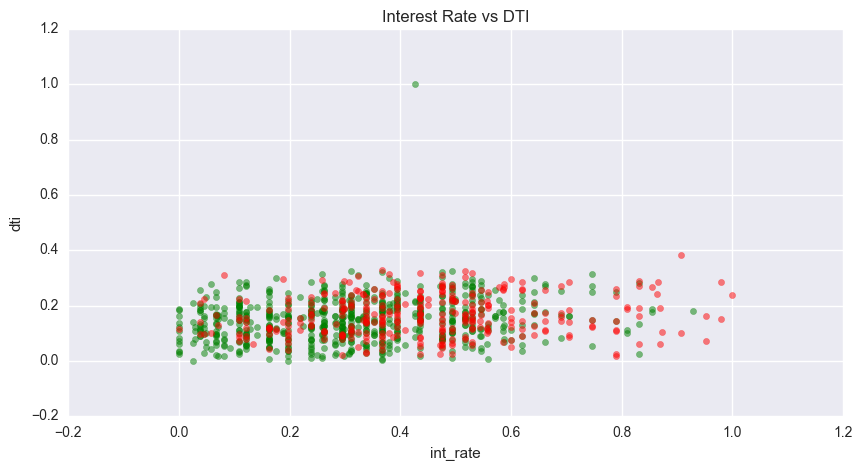

In [42]:
# plot of Interest Rate vs DTI
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_scaled.int_rate[good], X_scaled.dti[good], alpha=0.5, color='g')
ax.scatter(X_scaled.int_rate[bad], X_scaled.dti[bad], alpha=0.5, color='r')
ax.set_title("Interest Rate vs DTI")
ax.set_xlabel("int_rate")
ax.set_ylabel("dti")
plt.show()

In [43]:
print bb.to_csv('bb.csv',header=None,index=False)

bb_clean_noheaders = pd.read_csv('bb.csv', header=None)

bb_clean_noheaders.head(10)

None


,0,1,2,3,4,5,6,7
0,1,0,0,1,0.513235,0.546261,0.012351,0.289242
1,1,0,0,0,0.204412,0.066329,0.027626,0.067545
2,0,1,0,0,0.330882,0.704267,0.026753,0.095226
3,1,1,0,0,0.794118,0.746515,0.048575,0.146362
4,1,0,0,0,0.441176,0.294466,0.021516,0.276728
5,1,0,1,0,0.411765,0.197296,0.026753,0.158545
6,1,1,0,1,0.389706,0.690748,0.020862,0.167247
7,0,1,0,0,0.902941,0.873257,0.105311,0.106332
8,0,0,0,0,0.044118,0.324039,0.017152,0.252776
9,0,1,0,1,0.341176,0.474440,0.009296,0.136914


In [44]:
sig = lambda x: 1./(1+np.exp(-x))
def lnpred(data, a):
    pairedsum = a[0] + a[1]*data[1] + a[2]*data[2]+ a[3]*data[3] + a[4]*data[4] + a[5]*data[5] \
    + a[6]*data[6] + a[7]*data[7]
    if data[0] == 1:
        return np.log(sig(pairedsum))
    else:
        return np.log(1-sig(pairedsum))

In [45]:
def lnprob(a,data):
    A2 = np.sum([e**2 for e in a])
    return -0.5*A2 + np.sum([lnpred(e,a) for e in data])



In [46]:
blah = lambda a: lnprob(a, bb.values)

In [47]:
import emcee
nwalkers = 20
ndim = 8
p0 = np.random.rand(nwalkers*ndim).reshape((nwalkers,ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, blah)
pos, prob, state = sampler.run_mcmc(p0, 500)
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 500)
samples = sampler.flatchain

In [49]:
def MonteCarlo(f, samples):
    N = len(samples)
    return 1/float(N)*sum([f(e) for e in samples])

prediction = float(MonteCarlo(lambda x: 1/(1+np.exp(-(x[0]*bb.ix[0][0] + x[1]*bb.ix[0][1] + \
          x[2]*bb.ix[0][2] + x[3]*bb.ix[0][3] + x[4]*bb.ix[0][4] \
            + x[5]*bb.ix[0][5] + x[6]*bb.ix[0][6]))), samples))




In [50]:
prediction

0.578088749125156

In [52]:
"""def MonteCarlo(f, samples):
    N = len(samples)
    return 1/float(N)*sum([f(e) for e in samples])

omega0 = float(MonteCarlo(lambda x: x[0], samples))
omega1 = float(MonteCarlo(lambda x: x[1], samples))
omega2 = float(MonteCarlo(lambda x: x[2], samples))
omega3 = float(MonteCarlo(lambda x: x[3], samples))
omega4 = MonteCarlo(lambda x: x[4], samples)
omega5 = MonteCarlo(lambda x: x[5], samples)
omega6 = MonteCarlo(lambda x: x[6], samples)
lam = MonteCarlo(lambda x: x[7], samples)


print ('o0 = {0},\no1 = {1},\no2 = {2},\no3 = {3},\no4 = {4},\no5 = {5},\no6 = {6},\n \
1= {7}'.format(omega0, omega1, omega2, omega3, omega4, omega5, omega6,lam))


def MonteCarlo(f, samples):
    N = len(samples)
    return 1/float(N)*sum([f(e) for e in samples])

print ('o0 = {0},\no1 = {1},\no2 = {2},\no3 = {3},\no4 = {4},\no5 = {5},\no6 = {6},\n \
1= {7}'.format(omega0, omega1, omega2, omega3, omega4, omega5, omega6,lam))

lil_percent = 1/(1+np.exp(-(lam + omega0*bb.ix[0][0] + omega1*bb.ix[0][1] + \
          omega2*bb.ix[0][2] + omega3*bb.ix[0][3] + omega4*bb.ix[0][4] \
            + omega5*bb.ix[0][5] + omega6*bb.ix[0][6])))"""




'lil_percent = 1/(1+np.exp(-(lam + omega0*bb.ix[0][0] + omega1*bb.ix[0][1] +           omega2*bb.ix[0][2] + omega3*bb.ix[0][3] + omega4*bb.ix[0][4]             + omega5*bb.ix[0][5] + omega6*bb.ix[0][6])))'